In [68]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [69]:
data = pd.read_csv(r"C:\Users\Samarth Walse\Downloads\EllipsoidFitting\mag.txt", sep='\t', header=None, names=['x', 'y', 'z'])
data.head()

x         y         z
0  0.038462 -0.316154 -0.424615
1 -0.020000 -0.156154 -0.546923
2 -0.017692 -0.151538 -0.550000
3 -0.023077 -0.156923 -0.546154
4 -0.021538 -0.158462 -0.543077

In [70]:
rng = np.random.default_rng(seed=0)
a, b, c = 3, 2, 1  
N = 5000
phi = rng.uniform(0, 2*np.pi, size=N)
theta = np.arccos(1 - 2*rng.random(size=N))

x_e = a*np.sin(theta)*np.cos(phi)
y_e = b*np.sin(theta)*np.sin(phi)
z_e = c*np.cos(theta)

data_e = pd.DataFrame({'x': x_e, 'y': y_e, 'z': z_e})
data_e.head()

x         y         z
0 -1.247080 -0.966788 -0.770408
1 -0.343907  1.834640 -0.381291
2  2.899253  0.508890  0.035986
3  2.784910  0.193498 -0.359016
4  0.860622 -1.366408 -0.671518

In [71]:
fig = px.scatter_3d(data, x='x', y='y', z='z', color='z', opacity=0.5)
fig.add_scatter3d(x=data_e['x'], y=data_e['y'], z=data_e['z'], mode='markers')
fig.update_traces(marker=dict(size=1))
fig.show()


In [72]:
D = pd.DataFrame({'x^2' : data_e['x']**2, 'y^2' : data_e['y']**2, 'z^2' : data_e['z']**2, '2yz' : 2*data_e['y']*data_e['z'], '2xz' : 2*data_e['x']*data_e['z'], '2xy' : 2*data_e['x']*data_e['y'], '2x' : 2*data_e['x'], '2y' : 2*data_e['y'], '2z' : 2*data_e['z'], '1' : 1}).T
D

0         1         2         3         4         5         6     \
x^2  1.555209  0.118272  8.405665  7.755723  0.740669  3.028474  4.853456   
y^2  0.934679  3.365904  0.258969  0.037441  1.867071  0.501818  1.354003   
z^2  0.593529  0.145383  0.001295  0.128893  0.450936  0.538048  0.122226   
2yz  1.489644 -1.399063  0.036626 -0.138938  1.835134 -1.039235  0.813621   
2xz  1.921522  0.262257  0.208664 -1.999656 -1.155845  2.553010  1.540415   
2xy  2.411325 -1.261892  2.950801  1.077747 -2.351920 -2.465558  5.127025   
2x  -2.494160 -0.687814  5.798505  5.569820  1.721243  3.480502 -4.406112   
2y  -1.933576  3.669280  1.017780  0.386995 -2.732816 -1.416783 -2.327233   
2z  -1.540817 -0.762582  0.071972 -0.718033 -1.343035  1.467035 -0.699217   
1    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

         7         8         9     ...      4990      4991      4992  \
x^2  0.146881  7.744652  5.841338  ...  1.950692  0.025152  2.009627   
y^2  3.889966  0.272140  0.484949  ...  1.669758  3.957576  3.077969   
z^2  0.011188  0.071448  0.229725  ...  0.365817  0.007811  0.007216   
2yz  0.417240  0.278883 -0.667548  ...  1.563107  0.351647 -0.298062   
2xz  0.081077  1.487737  2.316810  ... -1.689492 -0.028034  0.240842   
2xy  1.511770  2.903536 -3.366157  ... -3.609533 -0.631007 -4.974161   
2x  -0.766501 -5.565843  4.833772  ...  2.793343  0.317190 -2.835226   
2y  -3.944599 -1.043341 -1.392766  ... -2.584382 -3.978731  3.508828   
2z  -0.211550 -0.534595  0.958593  ... -1.209656 -0.176764 -0.169892   
1    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   

         4993      4994      4995      4996      4997      4998      4999  
x^2  5.661102  1.341786  8.793578  5.650558  0.943844  1.548129  0.690036  
y^2  0.175479  3.336603  0.066282  0.609446  1.998151  0.275851  0.036603  
z^2  0.327119  0.016762  0.006365  0.219799  0.395591  0.759023  0.914179  
2yz  0.479176  0.472980 -0.041081 -0.731999 -1.778145 -0.915155 -0.365851  
2xz  2.721657 -0.299939  0.473180  2.228888  1.222090 -2.168009  1.588478  
2xy  1.993391 -4.231789 -1.526895 -3.711448 -2.746593  1.306986 -0.317851  
2x  -4.758614 -2.316710  5.930793 -4.754180  1.943033  2.488477  1.661368  
2y  -0.837803  3.653274 -0.514904  1.561341 -2.827119  1.050430 -0.382638  
2z  -1.143886  0.258935  0.159567 -0.937654  1.257920 -1.742438  1.912254  
1    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  

[10 rows x 5000 columns]

In [73]:
S = D.dot(D.T)
S

x^2           y^2          z^2          2yz           2xz  \
x^2  81071.371581  12185.554150  3002.900199   -87.234303    621.644923   
y^2  12185.554150  15884.677561  1339.557207   -16.521097   -101.726656   
z^2   3002.900199   1339.557207   992.261532   -17.028273     31.385236   
2yz    -87.234303    -16.521097   -17.028273  5358.228827     15.186589   
2xz    621.644923   -101.726656    31.385236    15.186589  12011.600798   
2xy   -353.804289   -206.543577     7.593295  -203.453311   -174.468606   
2x    3162.431813     62.984205   -67.709589   -79.830927   -190.800672   
2y     517.397568     95.094886   -55.176118   -52.760743    -79.830927   
2z     -95.400336    -26.380371    13.477477  -110.352237   -135.419178   
1    15057.218913   6664.677058  1660.806412   -30.851248     75.025230   

              2xy            2x            2y           2z             1  
x^2   -353.804289   3162.431813    517.397568   -95.400336  15057.218913  
y^2   -206.543577     62.984205     95.094886   -26.380371   6664.677058  
z^2      7.593295    -67.709589    -55.176118    13.477477   1660.806412  
2yz   -203.453311    -79.830927    -52.760743  -110.352237    -30.851248  
2xz   -174.468606   -190.800672    -79.830927  -135.419178     75.025230  
2xy  48742.216600   1034.795136    125.968410   -79.830927    -83.354187  
2x    1034.795136  60228.875650   -166.708375   150.050461    299.417775  
2y     125.968410   -166.708375  26658.708233   -61.702495     26.086222  
2z     -79.830927    150.050461    -61.702495  6643.225647     -3.717653  
1      -83.354187    299.417775     26.086222    -3.717653   5000.000000

In [74]:
S11 = S.iloc[0:6, 0:6]  # 6x6 matrix
S11

x^2           y^2          z^2          2yz           2xz  \
x^2  81071.371581  12185.554150  3002.900199   -87.234303    621.644923   
y^2  12185.554150  15884.677561  1339.557207   -16.521097   -101.726656   
z^2   3002.900199   1339.557207   992.261532   -17.028273     31.385236   
2yz    -87.234303    -16.521097   -17.028273  5358.228827     15.186589   
2xz    621.644923   -101.726656    31.385236    15.186589  12011.600798   
2xy   -353.804289   -206.543577     7.593295  -203.453311   -174.468606   

              2xy  
x^2   -353.804289  
y^2   -206.543577  
z^2      7.593295  
2yz   -203.453311  
2xz   -174.468606  
2xy  48742.216600

In [75]:
S12 = S.iloc[0:6, 6:]  # 6x4 matrix
S12

2x          2y          2z             1
x^2  3162.431813  517.397568  -95.400336  15057.218913
y^2    62.984205   95.094886  -26.380371   6664.677058
z^2   -67.709589  -55.176118   13.477477   1660.806412
2yz   -79.830927  -52.760743 -110.352237    -30.851248
2xz  -190.800672  -79.830927 -135.419178     75.025230
2xy  1034.795136  125.968410  -79.830927    -83.354187

In [76]:
S21 = S.iloc[6:, 0:6]  # 4x6 matrix
S21


x^2          y^2          z^2         2yz         2xz  \
2x   3162.431813    62.984205   -67.709589  -79.830927 -190.800672   
2y    517.397568    95.094886   -55.176118  -52.760743  -79.830927   
2z    -95.400336   -26.380371    13.477477 -110.352237 -135.419178   
1   15057.218913  6664.677058  1660.806412  -30.851248   75.025230   

            2xy  
2x  1034.795136  
2y   125.968410  
2z   -79.830927  
1    -83.354187

In [77]:
S22 = S.iloc[6:, 6:]  # 4x4 matrix
S22

2x            2y           2z            1
2x  60228.875650   -166.708375   150.050461   299.417775
2y   -166.708375  26658.708233   -61.702495    26.086222
2z    150.050461    -61.702495  6643.225647    -3.717653
1     299.417775     26.086222    -3.717653  5000.000000

In [78]:
S22_inv = np.linalg.inv(S22)
S22_inv

array([[ 1.66095019e-05,  1.03973071e-07, -3.74749995e-07,
        -9.95457108e-07],
       [ 1.03973071e-07,  3.75128432e-05,  3.45959201e-07,
        -2.01682715e-07],
       [-3.74749995e-07,  3.45959201e-07,  1.50541036e-04,
         1.32568278e-07],
       [-9.95457108e-07, -2.01682715e-07,  1.32568278e-07,
         2.00060762e-04]])

In [79]:
S22a = np.dot(S22_inv, S21)
S22b = np.dot(S12, S22a)
print(S22a.shape)
print(S22b.shape)

# S22b in terms of S12, S22 and S21
# S22b = np.dot(S12, np.dot(np.linalg.inv(S22), S21))
# S22b.shape

(4, 6)
(6, 6)


In [80]:
SS = S11 - S22b
SS

x^2          y^2          z^2          2yz           2xz  \
x^2  35633.897069 -7873.390856 -1990.974182     8.007625    402.586111   
y^2  -7873.390856  6999.021911  -874.934272    23.944383   -203.056511   
z^2  -1990.974182  -874.934272   439.952922    -6.875832      6.032338   
2yz      8.007625    23.944383    -6.875832  5356.001258     12.993856   
2xz    402.586111  -203.056511     6.032338    12.993856  12006.850784   
2xy   -145.087250   -90.174423    38.664411  -203.729502   -171.124689   

              2xy  
x^2   -145.087250  
y^2    -90.174423  
z^2     38.664411  
2yz   -203.729502  
2xz   -171.124689  
2xy  48721.226685

In [81]:
C = np.array([[-1,1,1,0,0,0],[1,-1,1,0,0,0],[1,1,-1,0,0,0],[0,0,0,-4,0,0],[0,0,0,0,-4,0],[0,0,0,0,0,-4]])
C_inv = np.linalg.inv(C)
C_inv

array([[-0.  ,  0.5 ,  0.5 , -0.  , -0.  , -0.  ],
       [ 0.5 ,  0.  ,  0.5 ,  0.  ,  0.  ,  0.  ],
       [ 0.5 ,  0.5 ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.  , -0.  , -0.  , -0.25, -0.  , -0.  ],
       [-0.  , -0.  , -0.  , -0.  , -0.25, -0.  ],
       [-0.  , -0.  , -0.  , -0.  , -0.  , -0.25]])

In [82]:
E = C_inv.dot(SS)
E.shape

(6, 6)

In [83]:
eigen_values, eigen_vectors = np.linalg.eig(E)
eigen_values, eigen_vectors

(array([-1.19103871e+04, -1.21806812e+04,  1.16872165e+03, -5.42292074e-12,
        -2.99923369e+03, -1.33873865e+03]),
 array([[ 3.39204636e-01,  5.89146590e-03,  1.79872000e-01,
         -1.07172764e-01, -8.78272285e-03,  1.31670485e-03],
        [-8.07101479e-01, -5.44491137e-03,  4.21532814e-01,
         -2.41138720e-01,  2.82298946e-02,  4.99908802e-03],
        [-4.83163294e-01,  3.16338476e-03,  8.88794315e-01,
         -9.64554880e-01,  2.23928302e-02,  9.08507077e-03],
        [-2.95976949e-04, -4.70134301e-03, -5.29890950e-04,
         -3.29822653e-17,  1.87976137e-03, -9.99932599e-01],
        [ 8.36501195e-03, -4.56694045e-03,  4.74868382e-04,
          1.81553754e-17,  9.99299295e-01,  1.89746577e-03],
        [-3.25398579e-03,  9.99941337e-01,  5.56542575e-04,
         -6.82316624e-17,  4.67791979e-03, -4.68337487e-03]]))

In [84]:
# Find the zero-based position of the only positive eigenvalue. The associated eigenvector will be in the corresponding column of matrix vr(6x6). 
idx = np.argwhere(np.isclose(eigen_values, 0.0, atol=1e-10)).reshape(-1)
print(idx)

# Extract the associated eigenvector v1
v1 = eigen_vectors[:, idx]
v1

[3]


array([[-1.07172764e-01],
       [-2.41138720e-01],
       [-9.64554880e-01],
       [-3.29822653e-17],
       [ 1.81553754e-17],
       [-6.82316624e-17]])

In [85]:
# # Check sign of eigenvector v1
# Check sign of eigenvector v1
# if(v1[0] < 0.0)
#  {
#   v1[0] = -v1[0];
#   v1[1] = -v1[1];
#   v1[2] = -v1[2];
#   v1[3] = -v1[3];
#   v1[4] = -v1[4];
#   v1[5] = -v1[5];
#  }

if v1[0] < 0.0:
    v1 = -v1
v1




array([[ 1.07172764e-01],
       [ 2.41138720e-01],
       [ 9.64554880e-01],
       [ 3.29822653e-17],
       [-1.81553754e-17],
       [ 6.82316624e-17]])

In [86]:
v2 = np.dot(S22a, v1)
v2.shape

(4, 1)

In [87]:
# Setup vector v
# v = new double[10];
# v[0] = v1[0];
# v[1] = v1[1];
# v[2] = v1[2];
# v[3] = v1[3];
# v[4] = v1[4];
# v[5] = v1[5];
# v[6] = -v2[0];
# v[7] = -v2[1];
# v[8] = -v2[2];
# v[9] = -v2[3];

v = np.array([v1[0], v1[1], v1[2], v1[3], v1[4], v1[5], -v2[0], -v2[1], -v2[2], -v2[3]])
v

(10, 1)

In [88]:
# A = v[0]        - term in x2
# B = v[1]        - term in y2
# C = v[2]        - term in z2
# D = v[5]        - term in xy  
# E = v[4]        - term in xz
# F = v[3]        - term in yz
# G = v[6]       - term in x
# H = v[7]        - term in y
# I = v[8]        - term in z
# J = v[9]        - constant term

A = v[0]
B = v[1]
C = v[2]
D = v[5]
E = v[4]
F = v[3]
G = v[6]
H = v[7]
I = v[8]
J = v[9]

Q = np.array([A, D, E, D, B, F, E, F, C]).reshape(3, 3)
U = np.array([G, H, I])
Q.shape, U.shape, Q, U

((3, 3),
 (3, 1),
 array([[ 1.07172764e-01,  6.82316624e-17, -1.81553754e-17],
        [ 6.82316624e-17,  2.41138720e-01,  3.29822653e-17],
        [-1.81553754e-17,  3.29822653e-17,  9.64554880e-01]]),
 array([[ 1.48067471e-17],
        [ 1.90223359e-17],
        [-2.32689318e-17]]))

In [89]:
# bias = - Q-1 u
bias = -np.linalg.inv(Q).dot(U)
bias

array([[-1.38157742e-16],
       [-7.88854479e-17],
       [ 2.41240103e-17]])

In [90]:
# The corresponding normalized eigenvectors v1, v2 and v3 of the matrix Q describe the direction of the 3 principal axis of the ellipsoid. And the matrix V formed from the column vectors v1, v2 and v3 is the rotation matrix that describes the orientation of the ellipsoid in the reference frame.
lmb, V = np.linalg.eig(Q)
lmb1, lmb2, lmb3 = lmb
v1, v2, v3 = V[:, 0], V[:, 1], V[:, 2]
lmb1, lmb2, lmb3, v1, v2, v3

(0.10717276443084803,
 0.24113871996940794,
 0.9645548798776382,
 array([1., 0., 0.]),
 array([ 5.09320910e-16,  1.00000000e+00, -1.55206804e-16]),
 array([ 2.11753605e-17, -1.61738791e-16, -1.00000000e+00]))

In [91]:
a = np.sqrt(((bias.T.dot(Q).dot(bias))-J)/lmb1)
b = np.sqrt(((bias.T.dot(Q).dot(bias))-J)/lmb2)
c = np.sqrt(((bias.T.dot(Q).dot(bias))-J)/lmb3)

a, b, c

(array([[3.]]), array([[2.]]), array([[1.]]))

In [92]:
mat_sqrt_eigen_diagonal = np.eye(3)
mat_sqrt_eigen_diagonal[0, 0] = np.sqrt(lmb1)
mat_sqrt_eigen_diagonal[1, 1] = np.sqrt(lmb2)
mat_sqrt_eigen_diagonal[2, 2] = np.sqrt(lmb3)

mat_sqrt_eigen_diagonal

array([[0.32737252, 0.        , 0.        ],
       [0.        , 0.49105877, 0.        ],
       [0.        , 0.        , 0.98211755]])

In [93]:
def calib(R, rawPoint_3x1):
    val_map = (R/a)*(1/np.sqrt(lmb1))*(np.dot(V, np.dot(mat_sqrt_eigen_diagonal, np.dot(np.linalg.inv(V), (rawPoint_3x1-bias)))))
    return val_map

In [94]:
data_e_calib = pd.DataFrame(columns=['x', 'y', 'z'])
for i in range(0, data_e.shape[0]):
    data_e_calib.loc[i] = calib(R=3, rawPoint_3x1=data_e.loc[i].values.reshape(3, 1)).reshape(3)

In [95]:
fig = px.scatter_3d(data_e, x='x', y='y', z='z', color='z', opacity=0.5)
fig.add_scatter3d(x=data_e_calib['x'], y=data_e_calib['y'], z=data_e_calib['z'], mode='markers')
fig.update_traces(marker=dict(size=1))
fig.show()

In [96]:
data_e_calib1 = pd.DataFrame(columns=['x', 'y', 'z'])
for i in range(0, data.shape[0]):
    data_e_calib1.loc[i] = calib(R=0.1, rawPoint_3x1=data.loc[i].values.reshape(3, 1)).reshape(3)

In [97]:
fig = px.scatter_3d(data, x='x', y='y', z='z', color='z', opacity=0.5)
fig.add_scatter3d(x=data_e_calib1['x'], y=data_e_calib1['y'], z=data_e_calib1['z'], mode='markers')
fig.update_traces(marker=dict(size=1))
fig.show()

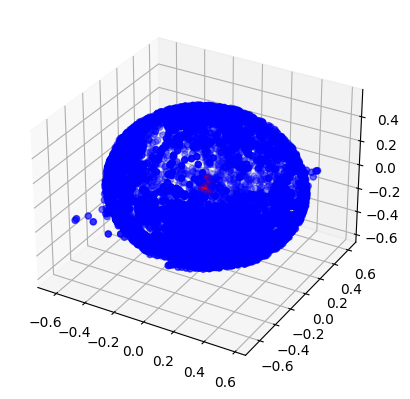

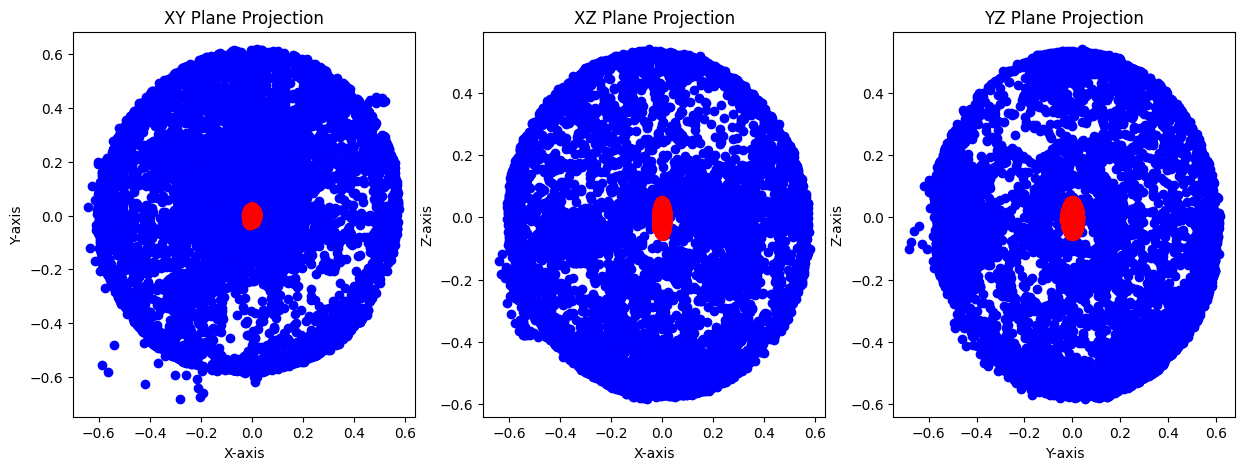

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['x'], data['y'], data['z'], c='b', marker='o')
ax.scatter(data_e_calib1['x'], data_e_calib1['y'], data_e_calib1['z'], c='r', marker='o')

# Create projections on XY, XZ, and YZ planes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# XY plane projection
axes[0].scatter(data['x'], data['y'], c='b', marker='o')
axes[0].scatter(data_e_calib1['x'], data_e_calib1['y'], c='r', marker='o')
axes[0].set_title('XY Plane Projection')
axes[0].set_xlabel('X-axis')
axes[0].set_ylabel('Y-axis')

# XZ plane projection
axes[1].scatter(data['x'], data['z'], c='b', marker='o')
axes[1].scatter(data_e_calib1['x'], data_e_calib1['z'], c='r', marker='o')
axes[1].set_title('XZ Plane Projection')
axes[1].set_xlabel('X-axis')
axes[1].set_ylabel('Z-axis')

# YZ plane projection
axes[2].scatter(data['y'], data['z'], c='b', marker='o')
axes[2].scatter(data_e_calib1['y'], data_e_calib1['z'], c='r', marker='o')
axes[2].set_title('YZ Plane Projection')
axes[2].set_xlabel('Y-axis')
axes[2].set_ylabel('Z-axis')

plt.show()